In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

In [3]:

data = pd.read_csv('/content/drive/MyDrive/DIC/cleaned_data_specific_continents.csv')

In [4]:
data

,country,year,population,gdp,coal_prod_change_twh,coal_prod_per_capita,coal_production,energy_cons_change_pct,energy_cons_change_twh,energy_per_capita,...,low_carbon_electricity,nuclear_elec_per_capita,nuclear_electricity,oil_prod_change_twh,oil_prod_per_capita,oil_production,other_renewable_electricity,other_renewables_elec_per_capita,primary_energy_consumption,continent
0,Argentina,1900,4685089.0,2.046512e+10,-0.000,-0.178,-0.005,3.243,10.644,14890.610,...,-0.040,-0.254,-0.009,-0.011,-23.471,-0.716,-0.001,-0.021,327.976,South America
1,Argentina,1901,4855502.0,2.133270e+10,-0.000,-0.178,-0.005,3.243,10.644,14890.610,...,-0.040,-0.254,-0.009,-0.011,-23.471,-0.716,-0.001,-0.021,327.976,South America
2,Argentina,1902,5036658.0,2.087368e+10,-0.000,-0.178,-0.005,3.243,10.644,14890.610,...,-0.040,-0.254,-0.009,-0.011,-23.471,-0.716,-0.001,-0.021,327.976,South America
3,Argentina,1903,5229108.0,2.402843e+10,-0.000,-0.178,-0.005,3.243,10.644,14890.610,...,-0.040,-0.254,-0.009,-0.011,-23.471,-0.716,-0.001,-0.021,327.976,South America
4,Argentina,1904,5428911.0,2.672760e+10,-0.000,-0.178,-0.005,3.243,10.644,14890.610,...,-0.040,-0.254,-0.009,-0.011,-23.471,-0.716,-0.001,-0.021,327.976,South America
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2165,Venezuela,2014,30193260.0,6.002817e+11,-3.655,224.448,6.787,-3.997,-40.872,32596.011,...,63.932,0.000,0.000,8.477,53219.591,1613.371,0.000,0.000,985.604,South America
2166,Venezuela,2015,30529722.0,5.606408e+11,0.009,222.252,6.796,-1.418,-13.894,31781.294,...,74.486,0.000,0.000,106.345,56113.609,1719.751,0.000,0.000,971.733,South America
2167,Venezuela,2016,30741464.0,4.577605e+11,-0.447,206.158,6.349,-9.334,-69.583,27475.727,...,62.616,0.000,0.000,-175.952,50002.185,1543.835,0.000,0.000,846.124,South America
2168,Venezuela,2017,30563430.0,3.859235e+11,-0.249,199.229,6.100,0.799,6.785,27859.093,...,60.789,0.000,0.000,-222.006,43032.872,1321.863,0.000,0.000,852.932,South America


In [12]:
one_hot_encoded_data = pd.get_dummies(data, columns = ['country','continent'])
# print(one_hot_encoded_data)

In [10]:
# encoded_data.to_csv("encoded_data.csv", index=False)

In [ ]:
one_hot_encoded_data['Years'] = one_hot_encoded_data['year'] - one_hot_encoded_data['year'].min()
print(one_hot_encoded_data)

      year  population           gdp  coal_prod_change_twh  \
0     1900   4685089.0  2.046512e+10                -0.000   
1     1901   4855502.0  2.133270e+10                -0.000   
2     1902   5036658.0  2.087368e+10                -0.000   
3     1903   5229108.0  2.402843e+10                -0.000   
4     1904   5428911.0  2.672760e+10                -0.000   
...    ...         ...           ...                   ...   
2165  2014  30193260.0  6.002817e+11                -3.655   
2166  2015  30529722.0  5.606408e+11                 0.009   
2167  2016  30741464.0  4.577605e+11                -0.447   
2168  2017  30563430.0  3.859235e+11                -0.249   
2169  2018  29825652.0  3.100745e+11                -0.239   

      coal_prod_per_capita  coal_production  energy_cons_change_pct  \
0                   -0.178           -0.005                   3.243   
1                   -0.178           -0.005                   3.243   
2                   -0.178           -0.00

In [ ]:
one_hot_encoded_data = one_hot_encoded_data.drop(['year'], axis=1)

In [ ]:
scaler = StandardScaler()
features_scaled = scaler.fit_transform(one_hot_encoded_data)

features_scaled_df = pd.DataFrame(features_scaled, columns=one_hot_encoded_data.columns)
print(features_scaled_df)

      population       gdp  coal_prod_change_twh  coal_prod_per_capita  \
0      -0.408819 -0.245103             -0.019154             -0.357826   
1      -0.405445 -0.244614             -0.019154             -0.357826   
2      -0.401858 -0.244873             -0.019154             -0.357826   
3      -0.398048 -0.243094             -0.019154             -0.357826   
4      -0.394093 -0.241571             -0.019154             -0.357826   
...          ...       ...                   ...                   ...   
2165    0.096195  0.081912             -0.060150             -0.323559   
2166    0.102856  0.059554             -0.019053             -0.323894   
2167    0.107048  0.001530             -0.024167             -0.326349   
2168    0.103523 -0.038986             -0.021947             -0.327406   
2169    0.088917 -0.081764             -0.021834             -0.327871   

      coal_production  energy_cons_change_pct  energy_cons_change_twh  \
0           -0.252549               -0

In [ ]:
X = features_scaled_df.drop(['gdp'], axis=1)
y = features_scaled_df['gdp']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)
# y_train_scaled = scaler.fit_transform(y_train.values.reshape(-1, 1))
# y_test_scaled = scaler.transform(y_test.values.reshape(-1, 1))

In [ ]:
print("X_train",X_train.shape)
print("X_test",X_test.shape)
print("y_train",y_train.shape)
print("y_test",y_test.shape)

X_train (1736, 54)
X_test (434, 54)
y_train (1736,)
y_test (434,)


In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
model.score(X_test, y_test)

0.9938055967635698

In [ ]:
prediction = model.predict(X_test)

In [ ]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, prediction)

0.03237384858135518

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, prediction)

0.005978559611710799

In [ ]:
print("Coefficients:", model.coef_)

# To get the intercept of the linear regression line
print("Intercept:", model.intercept_)
coef = model.coef_
intercept = model.intercept_

Coefficients: [ 3.10872034e-01 -1.01104132e-02  1.90054936e-02 -8.45382028e-02
  1.09467293e-03 -3.64065788e-02 -1.42949049e-03 -3.23790808e-02
  4.58448653e-03 -8.27721932e-04  3.01962836e-01  3.18806840e-01
 -3.48898008e-01 -1.31863783e-01  4.49176754e-01 -8.74045678e-02
 -2.89807919e-02  2.75012313e-02  3.24078753e-02 -1.21902903e-01
  9.68334404e-02 -4.48879820e-03  8.08106242e-01  1.48896053e-02
  4.64727578e-02  2.14456711e-02 -1.43701663e-02 -6.83044429e-02
  1.28656640e-02  1.45321678e-02  1.98804144e-02  5.54204307e-02
  2.91878233e-02  2.96245801e-02  2.12744428e-02  2.89618630e-02
  3.84403018e-02  2.56234436e-02  2.67436600e-02  3.75811971e-02
  1.80027346e-02  3.08503670e-02  2.50455648e-02 -7.80326362e-02
  1.35615465e-02  3.54521621e-02  3.38203963e-02  4.01692804e-02
 -3.46397299e-01  2.96946332e-04  1.25268738e-02 -2.34177956e-02
  2.34177956e-02 -1.34384021e-02]
Intercept: -0.00031656248924936384


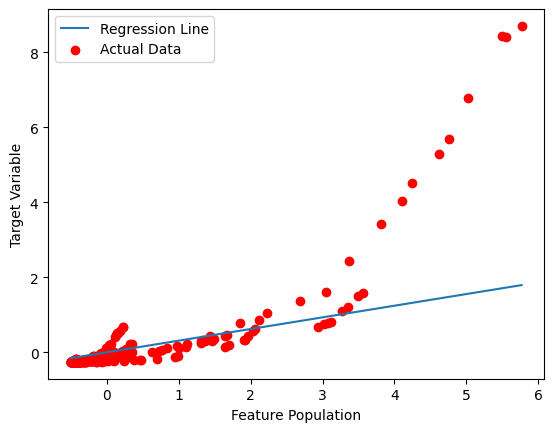

In [ ]:
w = coef[0]
x_min, x_max = min(X_test.iloc[:, 0]), max(X_test.iloc[:, 0])
y_min = w * x_min + intercept
y_max = w * x_max + intercept
plt.plot([x_min, x_max], [y_min, y_max], label='Regression Line')
plt.scatter(X_test.iloc[:, 0], y_test, color='red', label='Actual Data')

plt.xlabel('Feature Population')
plt.ylabel('Target Variable')
plt.legend()
plt.show()

In [ ]:
# plt.scatter(y_test, prediction, color='blue', label='Predicted', alpha=0.5)  # Predicted values in blue
# plt.scatter(y_test, y_test, color='red', label='Actual', alpha=0.5)  # Actual values in red

# plt.xlabel('Actual')
# plt.ylabel('Predicted')
# plt.legend()  # Add a legend to distinguish between actual and predicted values
# plt.show()

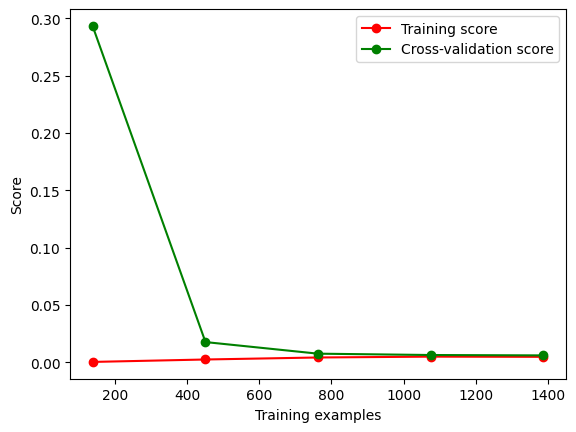

In [ ]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, validation_scores = learning_curve(
    model, X_train, y_train, train_sizes=np.linspace(0.1, 1.0, 5), cv=5, scoring='neg_mean_squared_error')

train_scores_mean = -train_scores.mean(axis=1)
validation_scores_mean = -validation_scores.mean(axis=1)

plt.style.use('seaborn')
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, validation_scores_mean, 'o-', color="g", label="Cross-validation score")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.legend(loc="best")
plt.show()

In [ ]:
features_scaled_df.columns

Index(['population', 'gdp', 'coal_prod_change_twh', 'coal_prod_per_capita',
       'coal_production', 'energy_cons_change_pct', 'energy_cons_change_twh',
       'energy_per_capita', 'energy_per_gdp', 'gas_prod_change_twh',
       'gas_prod_per_capita', 'gas_production', 'hydro_elec_per_capita',
       'hydro_electricity', 'low_carbon_elec_per_capita',
       'low_carbon_electricity', 'nuclear_elec_per_capita',
       'nuclear_electricity', 'oil_prod_change_twh', 'oil_prod_per_capita',
       'oil_production', 'other_renewable_electricity',
       'other_renewables_elec_per_capita', 'primary_energy_consumption',
       'country_Argentina', 'country_Barbados', 'country_Bolivia',
       'country_Brazil', 'country_Canada', 'country_Chile', 'country_Colombia',
       'country_Costa Rica', 'country_Cuba', 'country_Dominica',
       'country_Dominican Republic', 'country_Ecuador', 'country_El Salvador',
       'country_Guatemala', 'country_Haiti', 'country_Honduras',
       'country_Jamaica',

In [ ]:
!pip install xgboost

In [ ]:
from xgboost import XGBRegressor
model = XGBRegressor(max_depth = 5,reg_lambda=0.4)
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
model.score(X_test, y_test)

0.997833282414113

In [ ]:
pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, pred)

0.012809908552068937

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, pred)

0.00209121843614967

In [ ]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, pred))
print("RMSE:", rmse)

RMSE: 0.04572984185572557


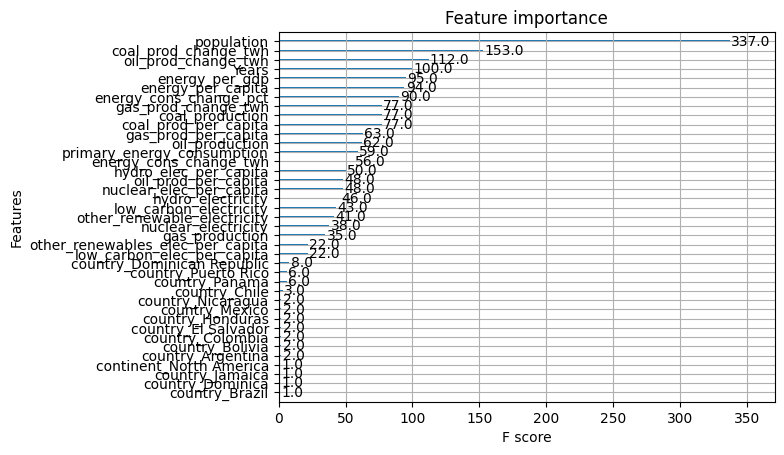

In [ ]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
plot_importance(model)
plt.show()

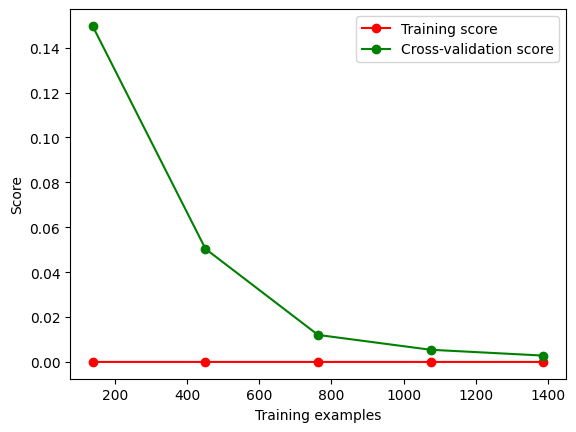

In [ ]:
from sklearn.model_selection import learning_curve
train_sizes, train_scores, validation_scores = learning_curve(model, X_train, y_train, train_sizes=np.linspace(0.1, 1.0, 5), cv=5, scoring='neg_mean_squared_error')
train_scores_mean = -train_scores.mean(axis=1)
validation_scores_mean = -validation_scores.mean(axis=1)
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, validation_scores_mean, 'o-', color="g", label="Cross-validation score")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.legend(loc="best")
plt.show()

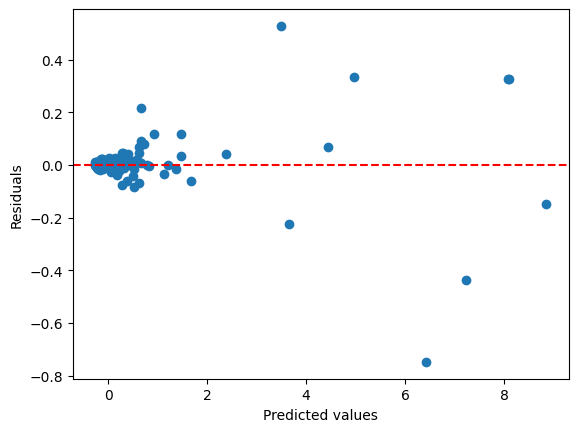

In [ ]:
y_pred = model.predict(X_test)
residuals = y_test - y_pred

plt.scatter(y_pred, residuals)
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='red', linestyle='--')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.7534562211981567
Accuracy: 0.7188940092165899


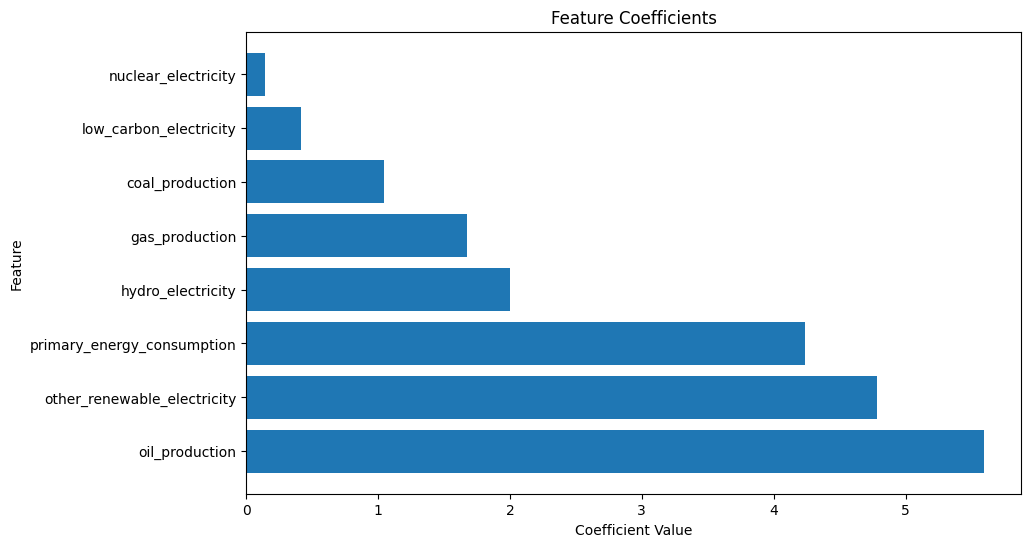

In [ ]:
#Logisitc regression to classify high or low gdp based off median dataset gdp
med = features_scaled_df['gdp'].median()

features_scaled_df['high_or_low_gdp'] = (features_scaled_df['gdp']>med).astype(int)

X = features_scaled_df[['primary_energy_consumption', 'coal_production', 'gas_production', 'oil_production', 'nuclear_electricity', 'hydro_electricity', 'low_carbon_electricity', 'other_renewable_electricity', 'low_carbon_electricity']]
y = features_scaled_df['high_or_low_gdp']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
x_train_scale = scaler.fit_transform(X_train)
x_test_scale = scaler.fit_transform(X_test)

model = LogisticRegression()
model.fit(X_train, y_train)

preds = model.predict(x_test_scale)
mod_score = model.score(X_test,y_test)
acc = accuracy_score(y_test, preds)
print(mod_score)
print(f"Accuracy: {acc}")

feature_names = X_train.columns
coefficients = model.coef_.flatten()

coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
coef_df = coef_df.sort_values(by='Coefficient', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(coef_df['Feature'], coef_df['Coefficient'])
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Feature Coefficients')
plt.show()

                   precision    recall  f1-score   support

         Balanced       0.99      0.97      0.98        71
   Fossil Reliant       1.00      1.00      1.00       216
Renewable Reliant       0.99      0.99      0.99       100

         accuracy                           0.99       387
        macro avg       0.99      0.99      0.99       387
     weighted avg       0.99      0.99      0.99       387



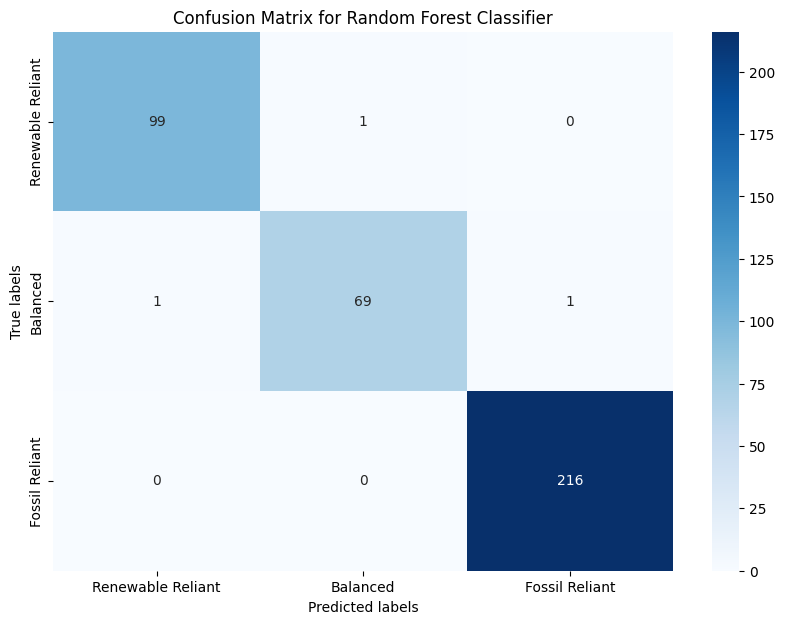

In [ ]:
#Random Forest to classify if it is fossil fuel relient, balanced, or renewable relient
data['renewable_total'] = data['hydro_electricity'] + data['low_carbon_electricity'] + data['other_renewable_electricity']
data['fossil_total'] = data['coal_production'] + data['gas_production'] + data['oil_production']
data['fossil_prop'] = data['fossil_total'] / (data['fossil_total'] + data['renewable_total'])

data['energy_prof'] = pd.cut(data['fossil_prop'], bins = [0,0.25,0.75,1], labels= ['Renewable Reliant', 'Balanced', 'Fossil Reliant'], include_lowest=True)
data.dropna(subset = ['energy_prof'], inplace=True)
X = data[['primary_energy_consumption', 'coal_production', 'gas_production', 'oil_production','hydro_electricity', 'low_carbon_electricity', 'other_renewable_electricity', 'coal_prod_per_capita', 'gas_prod_per_capita', 'oil_prod_per_capita', 'hydro_elec_per_capita', 'low_carbon_elec_per_capita', 'other_renewables_elec_per_capita','coal_prod_change_twh', 'gas_prod_change_twh', 'oil_prod_change_twh','energy_per_capita', 'energy_per_gdp']]
y = data['energy_prof']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
random_f = RandomForestClassifier(n_estimators=100, random_state=42)

random_f.fit(X_train, y_train)

preds = random_f.predict(X_test)
cm = confusion_matrix(y_test, preds, labels=["Renewable Reliant", "Balanced", "Fossil Reliant"])
print(classification_report(y_test, preds))
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Renewable Reliant", "Balanced", "Fossil Reliant"], yticklabels=["Renewable Reliant", "Balanced", "Fossil Reliant"])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix for Random Forest Classifier')
plt.show()



In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer

data_prepared = data.drop(['country'], axis=1)

label_encoder = LabelEncoder()
data_prepared['continent'] = label_encoder.fit_transform(data_prepared['continent'])

X = data_prepared.drop('continent', axis=1)
y = data_prepared['continent']

imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape


((1736, 25), (434, 25), (1736,), (434,))

In [6]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# K-Nearest Neighbors model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

#accuracy
accuracy_knn = accuracy_score(y_test, y_pred_knn)
accuracy_knn

0.9815668202764977

In [7]:
from sklearn.naive_bayes import GaussianNB

# Gaussian Naive Bayes model
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred_gnb = gnb.predict(X_test)

#accuracy
accuracy_gnb = accuracy_score(y_test, y_pred_gnb)
accuracy_gnb


0.6036866359447005

In [8]:
# SVM
from sklearn.svm import SVC

svm = SVC(kernel='rbf')
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
accuracy_svm

0.9170506912442397

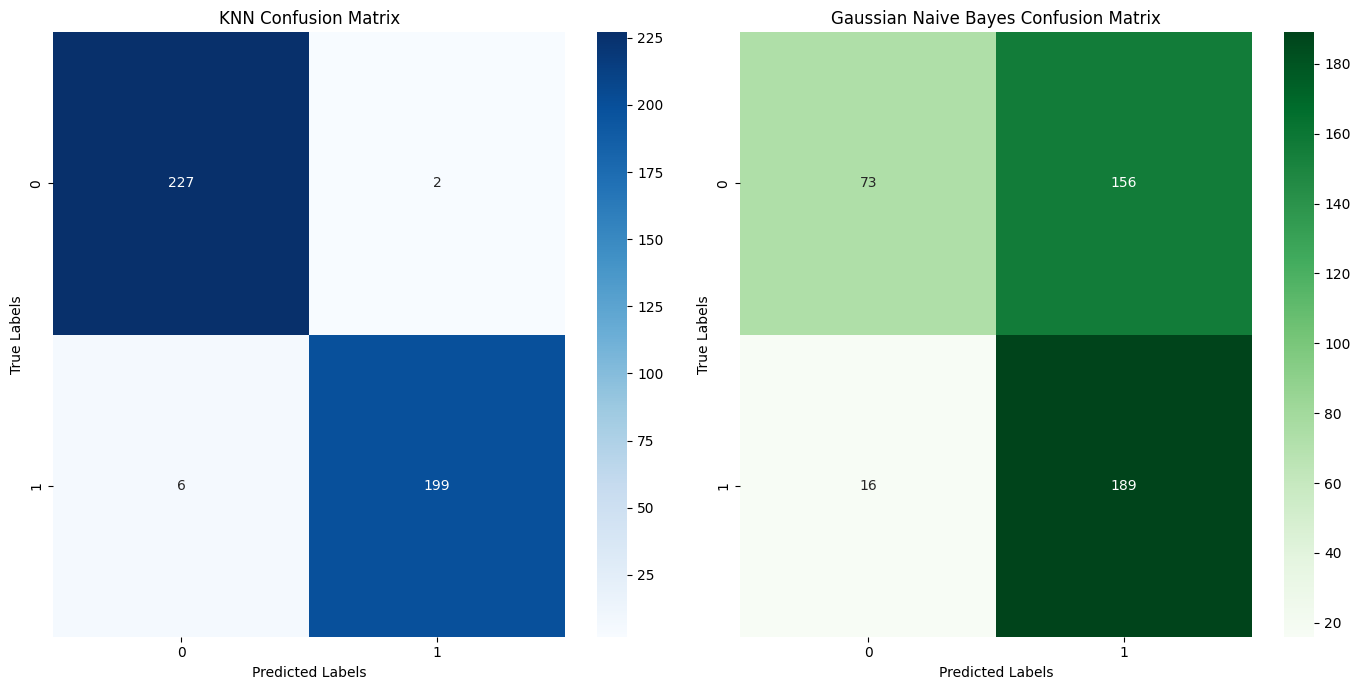

In [68]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

cm_knn = confusion_matrix(y_test, y_pred_knn)
cm_gnb = confusion_matrix(y_test, y_pred_gnb)
fig, ax = plt.subplots(1, 2, figsize=(14, 7))

# KNN
sns.heatmap(cm_knn, annot=True, fmt="d", ax=ax[0], cmap='Blues')
ax[0].set_title('KNN Confusion Matrix')
ax[0].set_xlabel('Predicted Labels')
ax[0].set_ylabel('True Labels')

# Naive Bayes
sns.heatmap(cm_gnb, annot=True, fmt="d", ax=ax[1], cmap='Greens')
ax[1].set_title('Gaussian Naive Bayes Confusion Matrix')
ax[1].set_xlabel('Predicted Labels')
ax[1].set_ylabel('True Labels')

plt.tight_layout()
plt.show()

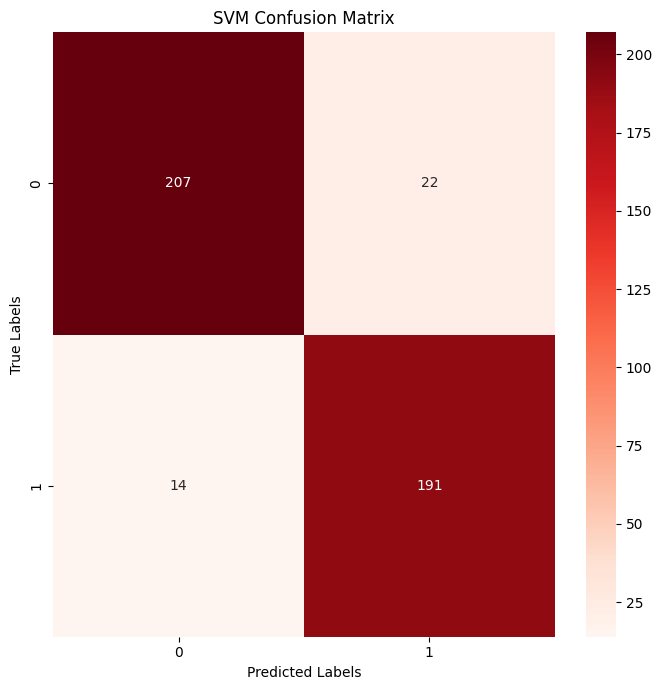

In [15]:
cm_svm = confusion_matrix(y_test, y_pred_svm)
fig = plt.subplots(figsize=(7, 7))
sns.heatmap(cm_svm, annot=True, fmt="d", cmap='Reds')
plt.title('SVM Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

plt.tight_layout()
plt.show()